In [30]:
pwd

'/Users/temismollz/ipynb files'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('year2000.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
0,2000,10,14,3,741.0,730,912.0,849,PS,1451,91.0,79,23.0,11.0,SAN,SFO,447.0,0,0,YES,YES,1,1
1,2000,10,15,4,729.0,730,903.0,849,PS,1451,94.0,79,14.0,-1.0,SAN,SFO,447.0,0,0,YES,NO,1,0
2,2000,10,17,6,741.0,730,918.0,849,PS,1451,97.0,79,29.0,11.0,SAN,SFO,447.0,0,0,YES,YES,1,1
3,2000,10,18,7,729.0,730,847.0,849,PS,1451,78.0,79,-2.0,-1.0,SAN,SFO,447.0,0,0,NO,NO,0,0
4,2000,10,19,1,749.0,730,922.0,849,PS,1451,93.0,79,33.0,19.0,SAN,SFO,447.0,0,0,YES,YES,1,1


In [5]:
df.shape 

(1048575, 23)

##### The dataset has 1048575 rows and 23 columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1048575 non-null  int64  
 1   Month              1048575 non-null  int64  
 2   DayofMonth         1048575 non-null  int64  
 3   DayOfWeek          1048575 non-null  int64  
 4   DepTime            1034053 non-null  float64
 5   CRSDepTime         1048575 non-null  int64  
 6   ArrTime            1031273 non-null  float64
 7   CRSArrTime         1048575 non-null  int64  
 8   UniqueCarrier      1048575 non-null  object 
 9   FlightNum          1048575 non-null  int64  
 10  ActualElapsedTime  1031273 non-null  float64
 11  CRSElapsedTime     1048575 non-null  int64  
 12  ArrDelay           1031273 non-null  float64
 13  DepDelay           1034053 non-null  float64
 14  Origin             1048575 non-null  object 
 15  Dest               1048575 non-n

###### I want to use this data set to answer these questions 
###### Define what I will consider a delayed flight
###### airport with the most delayed flights
###### is it a Binary or multiclass classification problem 

In [7]:
top20_dest = list(df['Dest'].value_counts().head(20).index)
print(top20_dest)
top20_dest_df = df[df['Dest'].isin(top20_dest)][['UniqueCarrier','Origin','Dest','ArrDelay','DepDelay','IsArrDelayed','IsDepDelayed']]
top20_dest_df.head()

['ORD', 'ATL', 'LAX', 'DEN', 'DFW', 'STL', 'SFO', 'PHX', 'DTW', 'MSP', 'EWR', 'LGA', 'PIT', 'BOS', 'MEM', 'LAS', 'DCA', 'CLT', 'IAH', 'PHL']


,UniqueCarrier,Origin,Dest,ArrDelay,DepDelay,IsArrDelayed,IsDepDelayed
0,PS,SAN,SFO,23.0,11.0,YES,YES
1,PS,SAN,SFO,14.0,-1.0,YES,NO
2,PS,SAN,SFO,29.0,11.0,YES,YES
3,PS,SAN,SFO,-2.0,-1.0,NO,NO
4,PS,SAN,SFO,33.0,19.0,YES,YES


In [8]:
df.UniqueCarrier.value_counts()

UA        152624
DL        123254
AA        109291
NW        108273
EA         86205
CO         82164
PI         78425
TW         69650
US         63299
WN         61975
HP         45399
PS         41706
AS         14399
PA (1)     11911
Name: UniqueCarrier, dtype: int64

##### it is important to note that a cancelled flight is not delayed because it never left or arrived

In [9]:
df.Cancelled.nunique()

2

In [10]:
df.Cancelled.value_counts()

0    1034053
1      14522
Name: Cancelled, dtype: int64

In [11]:
dummy = df[(df['Cancelled'] == 1)]
print('dummy shape:', dummy.shape)
print('====================================')
print('dummy dataframe:')
dummy.head(3).append(dummy.tail(3))

dummy shape: (14522, 23)
dummy dataframe:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
52,2000,10,12,1,NaN,1505,NaN,1608,PS,1453,NaN,63,NaN,NaN,BUR,OAK,325.0,1,0,YES,YES,1,1
79,2000,10,12,1,NaN,1635,NaN,1732,PS,1454,NaN,57,NaN,NaN,OAK,BUR,325.0,1,0,YES,YES,1,1
98,2000,10,6,2,NaN,830,NaN,937,PS,1457,NaN,67,NaN,NaN,LAX,SFO,337.0,1,0,YES,YES,1,1
1048500,2000,12,25,5,NaN,630,NaN,737,PA (1),241,NaN,67,NaN,NaN,LGA,DCA,214.0,1,0,YES,YES,1,1
1048526,2000,12,25,5,NaN,730,NaN,830,PA (1),242,NaN,60,NaN,NaN,DCA,LGA,214.0,1,0,YES,YES,1,1
1048553,2000,12,25,5,NaN,730,NaN,837,PA (1),243,NaN,67,NaN,NaN,LGA,DCA,214.0,1,0,YES,YES,1,1


##### I created a dummy dataframe for Cancelled flights equating to 1

In [12]:
dummy.Cancelled.nunique()

1

In [13]:
dummy.Cancelled.value_counts()

1    14522
Name: Cancelled, dtype: int64

In [14]:
# drop the cancelled flight = 0 

df = df[(df['Cancelled'] == 0)]
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
0,2000,10,14,3,741.0,730,912.0,849,PS,1451,91.0,79,23.0,11.0,SAN,SFO,447.0,0,0,YES,YES,1,1
1,2000,10,15,4,729.0,730,903.0,849,PS,1451,94.0,79,14.0,-1.0,SAN,SFO,447.0,0,0,YES,NO,1,0
2,2000,10,17,6,741.0,730,918.0,849,PS,1451,97.0,79,29.0,11.0,SAN,SFO,447.0,0,0,YES,YES,1,1
3,2000,10,18,7,729.0,730,847.0,849,PS,1451,78.0,79,-2.0,-1.0,SAN,SFO,447.0,0,0,NO,NO,0,0
4,2000,10,19,1,749.0,730,922.0,849,PS,1451,93.0,79,33.0,19.0,SAN,SFO,447.0,0,0,YES,YES,1,1


In [15]:
df = df.drop(['Cancelled'], axis = 1)

In [16]:
df.shape

(1034053, 22)

### Origin & Dest

In [17]:
df.Origin.unique()


array(['SAN', 'SFO', 'BUR', 'OAK', 'LAX', 'PHX', 'SJC', 'LAS', 'SNA',
       'SMF', 'ABQ', 'MFR', 'SCK', 'MRY', 'TUS', 'EUG', 'SEA', 'RDM',
       'PDX', 'RNO', 'ONT', 'CCR', 'FAT', 'LGB', 'PSC', 'YKM', 'BLI',
       'GEG', 'JFK', 'STL', 'HNL', 'MIA', 'SJU', 'DEN', 'CVG', 'DCA',
       'DTW', 'SYR', 'LGA', 'BOS', 'PHL', 'TPA', 'MCO', 'MKE', 'IAD',
       'CMH', 'ORD', 'PIT', 'EWR', 'HOU', 'SAT', 'DAY', 'IND', 'FLL',
       'BNA', 'CLE', 'DFW', 'BWI', 'ORF', 'COS', 'MCI', 'LIT', 'TUL',
       'BDL', 'SLC', 'SDF', 'IAH', 'JAX', 'PSP', 'ANC', 'MSY', 'OMA',
       'RSW', 'SRQ', 'ICT', 'ATL', 'MDW', 'AUS', 'MSP', 'PBI', 'OKC',
       'MLI', 'MSN', 'CLT', 'DSM', 'RDU', 'FSD', 'PIA', 'SGF', 'LEX',
       'CMI', 'CID', 'SUX', 'TOL', 'LNK', 'MDT', 'ALO', 'RST', 'MEM',
       'OGG', 'FAI', 'KOA', 'ROC', 'MBS', 'LIH', 'SBA', 'ALB', 'GSO',
       'GRR', 'BIL', 'BHM', 'CAE', 'MHT', 'ELP', 'TYS', 'JAN', 'BFL',
       'HSV', 'SAV', 'BGR', 'PWM', 'ABE', 'BOI', 'CAK', 'GTF', 'BUF',
       'CPR', 'BTV',

In [18]:
df_Origin = df.Origin.unique()
df_Dest = df.Dest.unique()

In [19]:
print(type(df_Origin))
print(type(df_Dest))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
print(len(df_Origin))
print(len(df_Dest))

236
236


##### Diverted

In [21]:
df.Diverted.value_counts()

0    1031273
1       2780
Name: Diverted, dtype: int64

In [22]:
# To separate the df with columns Diverted = 1 & Not Diverted = 0
Diverted1 = df['Diverted']==1

In [23]:
df_Div = df[Diverted1]
print(df_Div.shape)

(2780, 22)


In [24]:
df_Div.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
1733,2000,10,22,4,1844.0,1830,NaN,2020,PS,1538,NaN,110,NaN,14.0,SFO,BUR,326.0,1,YES,YES,1,1
1850,2000,10,7,3,653.0,630,NaN,723,PS,1546,NaN,53,NaN,23.0,SJC,BUR,296.0,1,YES,YES,1,1
2241,2000,10,1,4,705.0,705,NaN,835,PS,1562,NaN,90,NaN,0.0,OAK,BUR,325.0,1,YES,NO,1,0
2505,2000,10,5,1,1750.0,1750,NaN,1930,PS,1571,NaN,100,NaN,0.0,LAS,SAN,258.0,1,YES,NO,1,0
3055,2000,10,2,5,2205.0,2200,NaN,2330,PS,1591,NaN,90,NaN,5.0,SFO,SEA,679.0,1,YES,YES,1,1


In [25]:
df_Div.ArrDelay.nunique()

0

In [26]:
df_Div.ArrDelay.unique()

array([nan])

In [27]:
df_Div.ArrTime.nunique()

0

##### This means that there are no delay on arrival when flights diverted = 1. 

In [28]:
df_Div.ArrTime.nunique()

0

In [29]:
df = df.drop(['Diverted'], axis=1)
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
0,2000,10,14,3,741.0,730,912.0,849,PS,1451,91.0,79,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1
1,2000,10,15,4,729.0,730,903.0,849,PS,1451,94.0,79,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0
2,2000,10,17,6,741.0,730,918.0,849,PS,1451,97.0,79,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1
3,2000,10,18,7,729.0,730,847.0,849,PS,1451,78.0,79,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0
4,2000,10,19,1,749.0,730,922.0,849,PS,1451,93.0,79,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1
5,2000,10,21,3,728.0,730,848.0,849,PS,1451,80.0,79,-1.0,-2.0,SAN,SFO,447.0,NO,NO,0,0
6,2000,10,22,4,728.0,730,852.0,849,PS,1451,84.0,79,3.0,-2.0,SAN,SFO,447.0,YES,NO,1,0
7,2000,10,23,5,731.0,730,902.0,849,PS,1451,91.0,79,13.0,1.0,SAN,SFO,447.0,YES,YES,1,1
8,2000,10,24,6,744.0,730,908.0,849,PS,1451,84.0,79,19.0,14.0,SAN,SFO,447.0,YES,YES,1,1
9,2000,10,25,7,729.0,730,851.0,849,PS,1451,82.0,79,2.0,-1.0,SAN,SFO,447.0,YES,NO,1,0


In [30]:
df.shape

(1034053, 21)

###### I dropped Flight number because i wont be using it to make predictions 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034053 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1034053 non-null  int64  
 1   Month              1034053 non-null  int64  
 2   DayofMonth         1034053 non-null  int64  
 3   DayOfWeek          1034053 non-null  int64  
 4   DepTime            1034053 non-null  float64
 5   CRSDepTime         1034053 non-null  int64  
 6   ArrTime            1031273 non-null  float64
 7   CRSArrTime         1034053 non-null  int64  
 8   UniqueCarrier      1034053 non-null  object 
 9   FlightNum          1034053 non-null  int64  
 10  ActualElapsedTime  1031273 non-null  float64
 11  CRSElapsedTime     1034053 non-null  int64  
 12  ArrDelay           1031273 non-null  float64
 13  DepDelay           1034053 non-null  float64
 14  Origin             1034053 non-null  object 
 15  Dest               1034053 non-n

I have decided to drop Arrival & Departure Time because the time stamps can be misleading because it is not really telling us anything about the flight delay  

In [32]:
df.drop(columns=['DepTime', 'ArrTime'], inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
0,2000,10,14,3,730,849,PS,1451,91.0,79,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1
1,2000,10,15,4,730,849,PS,1451,94.0,79,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0
2,2000,10,17,6,730,849,PS,1451,97.0,79,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1
3,2000,10,18,7,730,849,PS,1451,78.0,79,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0
4,2000,10,19,1,730,849,PS,1451,93.0,79,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1


In [33]:
df.to_csv('year2000(1).csv')

###### Dealing with Missing Values 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034053 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1034053 non-null  int64  
 1   Month              1034053 non-null  int64  
 2   DayofMonth         1034053 non-null  int64  
 3   DayOfWeek          1034053 non-null  int64  
 4   CRSDepTime         1034053 non-null  int64  
 5   CRSArrTime         1034053 non-null  int64  
 6   UniqueCarrier      1034053 non-null  object 
 7   FlightNum          1034053 non-null  int64  
 8   ActualElapsedTime  1031273 non-null  float64
 9   CRSElapsedTime     1034053 non-null  int64  
 10  ArrDelay           1031273 non-null  float64
 11  DepDelay           1034053 non-null  float64
 12  Origin             1034053 non-null  object 
 13  Dest               1034053 non-null  object 
 14  Distance           1033396 non-null  float64
 15  IsArrDelayed       1034053 non-n

In [35]:
df.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    2780
CRSElapsedTime          0
ArrDelay             2780
DepDelay                0
Origin                  0
Dest                    0
Distance              657
IsArrDelayed            0
IsDepDelayed            0
ArrDelClass             0
DepDelClass             0
dtype: int64

In [36]:
print('Number of total missing values:', df.isna().sum().sum())
print('df shape:', df.shape)

Number of total missing values: 6217
df shape: (1034053, 19)


In [37]:
df_NaN = df.loc[df.isnull().any(axis=1)]
df_NaN.head(10)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
1733,2000,10,22,4,1830,2020,PS,1538,NaN,110,NaN,14.0,SFO,BUR,326.0,YES,YES,1,1
1850,2000,10,7,3,630,723,PS,1546,NaN,53,NaN,23.0,SJC,BUR,296.0,YES,YES,1,1
2241,2000,10,1,4,705,835,PS,1562,NaN,90,NaN,0.0,OAK,BUR,325.0,YES,NO,1,0
2505,2000,10,5,1,1750,1930,PS,1571,NaN,100,NaN,0.0,LAS,SAN,258.0,YES,NO,1,0
3055,2000,10,2,5,2200,2330,PS,1591,NaN,90,NaN,5.0,SFO,SEA,679.0,YES,YES,1,1
3497,2000,10,9,5,820,940,PS,1614,NaN,80,NaN,6.0,SJC,SNA,342.0,YES,YES,1,1
4286,2000,10,28,3,2240,2330,PS,1671,NaN,50,NaN,-1.0,LAS,SAN,258.0,YES,NO,1,0
4377,2000,10,5,1,655,900,PS,1674,NaN,125,NaN,-1.0,SJC,SAN,417.0,YES,NO,1,0
5233,2000,10,6,2,1030,1122,PS,1709,NaN,52,NaN,71.0,LAS,LAX,236.0,YES,YES,1,1
5679,2000,10,31,6,1945,2211,PS,1723,NaN,146,NaN,134.0,LAX,SEA,954.0,YES,YES,1,1


In [38]:
df_NaN.shape


(3437, 19)

There are a total of 3,437 rows with missing values out of 1,034,053 rows of data

In [39]:
percentage_NaN = (len(df_NaN)*100)/len(df)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 0.332381415652776


##### Arrival Delay 

The Arrival Delay = Actual Time - Scheduled Arrival. Time therefore, the NaN means that there are no delays on departure. 
Since there are no delay NaN becomes = 0 and this will explain the 3.437 rows to 0.

In [40]:
df["ArrDelay"] = df["ArrDelay"].fillna(0)
df.isna().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    2780
CRSElapsedTime          0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance              657
IsArrDelayed            0
IsDepDelayed            0
ArrDelClass             0
DepDelClass             0
dtype: int64

#### Time-Related Columns 

##### Time is normally a categorical and having it in the current format will give us too many columns when the hot encode is applied to them, therefore I will split the time into 4 quarters of the days meaning of 6 hours each.

In [41]:
df['CRSDepTimeE'] = np.ceil(df['CRSDepTime']/600).apply(int)
df['CRSArrTime'] = np.ceil(df['CRSArrTime']/600).apply(int) 
df['CRSElapsedTime'] = np.ceil(df['CRSElapsedTime']/600).apply(int)


In [42]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE
0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2
1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2
2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2
3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2
4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2


In [43]:
print('Maximum number of days in a month:', df.DayofMonth.nunique())
print('Total number of months:', df.Month.nunique())

Maximum number of days in a month: 31
Total number of months: 3


In [44]:
import calendar
df['MONTH'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


In [45]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH
0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct
1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct
2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct
3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct
4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct


In [46]:
print('Months present in dataframe:', df.Month.unique())
print('Months present in dataframe:', df.MONTH.unique())

Months present in dataframe: [10 11 12]
Months present in dataframe: ['Oct' 'Nov' 'Dec']


## Binary Classification 

In [47]:
status = []

for value in df['ArrDelay']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['FlightStatus'] = status
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1
2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct,0
4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
5,2000,10,21,3,730,2,PS,1451,80.0,1,-1.0,-2.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct,0
6,2000,10,22,4,730,2,PS,1451,84.0,1,3.0,-2.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1
7,2000,10,23,5,730,2,PS,1451,91.0,1,13.0,1.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
8,2000,10,24,6,730,2,PS,1451,84.0,1,19.0,14.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
9,2000,10,25,7,730,2,PS,1451,82.0,1,2.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1


In [48]:
df.FlightStatus.value_counts(normalize=True)

1    0.663627
0    0.336373
Name: FlightStatus, dtype: float64

###### 66.36% of the flights have no delays however this could mean that they arrived early or on time while 33.63% of flights were delayed. 

In [49]:
df.to_csv('year2000(1).csv')

In [50]:
df.isna().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    2780
CRSElapsedTime          0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance              657
IsArrDelayed            0
IsDepDelayed            0
ArrDelClass             0
DepDelClass             0
CRSDepTimeE             0
MONTH                   0
FlightStatus            0
dtype: int64

#### Distance 

In [51]:
df['Distance'].fillna((df['Distance'].mean()), inplace=True)
df_NaN['Distance'].fillna((df_NaN['Distance'].mean()), inplace=True)


In [52]:
df_NaN.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass
1733,2000,10,22,4,1830,2020,PS,1538,NaN,110,NaN,14.0,SFO,BUR,326.0,YES,YES,1,1
1850,2000,10,7,3,630,723,PS,1546,NaN,53,NaN,23.0,SJC,BUR,296.0,YES,YES,1,1
2241,2000,10,1,4,705,835,PS,1562,NaN,90,NaN,0.0,OAK,BUR,325.0,YES,NO,1,0
2505,2000,10,5,1,1750,1930,PS,1571,NaN,100,NaN,0.0,LAS,SAN,258.0,YES,NO,1,0
3055,2000,10,2,5,2200,2330,PS,1591,NaN,90,NaN,5.0,SFO,SEA,679.0,YES,YES,1,1


In [53]:
df.isna().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    2780
CRSElapsedTime          0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
IsArrDelayed            0
IsDepDelayed            0
ArrDelClass             0
DepDelClass             0
CRSDepTimeE             0
MONTH                   0
FlightStatus            0
dtype: int64

In [54]:
df = df.dropna()


In [55]:
df.isna().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
IsArrDelayed         0
IsDepDelayed         0
ArrDelClass          0
DepDelClass          0
CRSDepTimeE          0
MONTH                0
FlightStatus         0
dtype: int64

In [56]:
df.to_csv('year2000(1).csv')

#### WEEKDAY 

In [57]:
df.DayOfWeek.value_counts()

4    156152
1    152101
5    149518
7    145329
3    144581
2    143903
6    139689
Name: DayOfWeek, dtype: int64

##### Weekday Glossary 

1 = Monday
2 = Tuesday
3 = Wednesday
4 = Thursday
5 = Friday
6 = Saturday
7 = Sunday

### Destination 

In [58]:
df.Dest.value_counts().iloc[:30]

ORD    56527
ATL    47061
LAX    37813
DFW    35478
DEN    34816
STL    30949
SFO    30442
PHX    27873
DTW    25734
MSP    22032
EWR    21918
LGA    21785
PIT    19929
BOS    18551
MEM    18468
LAS    17515
CLT    16475
DCA    16414
IAH    15274
PHL    14962
SEA    14002
MIA    13045
IAD    12688
HOU    12657
MCO    12636
SAN    12448
SLC    11545
BWI    11382
TPA    11186
CVG    10716
Name: Dest, dtype: int64

In [59]:
TopCities = df.Dest.value_counts().iloc[0:20].rename_axis('Dest').reset_index(name='TotalFlights')
TopCities.head()


,Dest,TotalFlights
0,ORD,56527
1,ATL,47061
2,LAX,37813
3,DFW,35478
4,DEN,34816


In [60]:
TopCities.Dest.unique()

array(['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'STL', 'SFO', 'PHX', 'DTW',
       'MSP', 'EWR', 'LGA', 'PIT', 'BOS', 'MEM', 'LAS', 'CLT', 'DCA',
       'IAH', 'PHL'], dtype=object)

In [61]:
# Creating a list with top 20 cities only:
CityList = TopCities['Dest'].tolist()

In [62]:
CityList

['ORD',
 'ATL',
 'LAX',
 'DFW',
 'DEN',
 'STL',
 'SFO',
 'PHX',
 'DTW',
 'MSP',
 'EWR',
 'LGA',
 'PIT',
 'BOS',
 'MEM',
 'LAS',
 'CLT',
 'DCA',
 'IAH',
 'PHL']

In [63]:
# creating a new df using the CityList 
boolean_series = df.Dest.isin(CityList)
df1 = df[boolean_series]
df1.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1
2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct,0
4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1


In [64]:
# Checking to see if Dest column matches with CityList
df1.Dest.unique()

array(['SFO', 'LAX', 'LAS', 'PHX', 'STL', 'DEN', 'DCA', 'BOS', 'PHL',
       'ORD', 'LGA', 'EWR', 'PIT', 'DTW', 'IAH', 'DFW', 'ATL', 'CLT',
       'MSP', 'MEM'], dtype=object)

In [65]:
df1.Dest.value_counts()


ORD    56527
ATL    47061
LAX    37813
DFW    35478
DEN    34816
STL    30949
SFO    30442
PHX    27873
DTW    25734
MSP    22032
EWR    21918
LGA    21785
PIT    19929
BOS    18551
MEM    18468
LAS    17515
CLT    16475
DCA    16414
IAH    15274
PHL    14962
Name: Dest, dtype: int64

In [66]:
df1.shape

(530016, 22)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530016 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               530016 non-null  int64  
 1   Month              530016 non-null  int64  
 2   DayofMonth         530016 non-null  int64  
 3   DayOfWeek          530016 non-null  int64  
 4   CRSDepTime         530016 non-null  int64  
 5   CRSArrTime         530016 non-null  int64  
 6   UniqueCarrier      530016 non-null  object 
 7   FlightNum          530016 non-null  int64  
 8   ActualElapsedTime  530016 non-null  float64
 9   CRSElapsedTime     530016 non-null  int64  
 10  ArrDelay           530016 non-null  float64
 11  DepDelay           530016 non-null  float64
 12  Origin             530016 non-null  object 
 13  Dest               530016 non-null  object 
 14  Distance           530016 non-null  float64
 15  IsArrDelayed       530016 non-null  object 
 16  I

In [68]:
df.shape

(1031273, 22)

##### Using https://www.claimcompass.eu/blog/why-is-my-flight-delayed/ and https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?6B2r=FE&20=E https://www.faa.gov/podcasts/ to know the actual causes of flight delays 

Here are some of the list 
1. Air Traffic Control (ATC) restrictions
2. Adverse weather conditions
3. Bird strikes
4. Knock-on effect due to a delayed aircraft
5. Strikes
6. Waiting for connecting passengers
7. Waiting for connecting bags
8. Waiting for cargo
9. Waiting for crew
10. Complying with flight crew rest requirements
11. Waiting for catering
12. Getting security clearance
13. Preparing the aircraft
14. Fixing a mechanical issue
15. Complying with weight restrictions
16. Problems with the coffee machine
17. Waiting for turtles to clear the runway
18. Passengers going nuts
19. There is a French person on board
20. There is a criminal on board
21. Air Carrier Delay



In [69]:
df1 = df1.drop(columns=['MONTH'])

In [70]:
df1.shape

(530016, 21)

In [71]:
df1.corr()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,ArrDelClass,DepDelClass,CRSDepTimeE,FlightStatus
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.017853,-0.031169,-0.001436,-0.008568,0.035804,0.018967,-0.002222,0.124953,0.125904,0.002442,0.045829,0.066294,-0.006931,0.042228
DayofMonth,NaN,-0.017853,1.000000,0.004147,-0.003627,-0.003676,-0.000717,0.006065,-0.000643,0.049925,0.050703,0.001727,0.031570,0.046733,-0.004035,0.027798
DayOfWeek,NaN,-0.031169,0.004147,1.000000,0.005112,0.005784,-0.004392,-0.001959,-0.000621,-0.040507,-0.015217,0.009405,-0.054435,-0.013663,0.002009,-0.054239
CRSDepTime,NaN,-0.001436,-0.003627,0.005112,1.000000,0.764389,0.022898,-0.003099,-0.001854,0.094439,0.107702,-0.013292,0.061869,0.120832,0.930475,0.057308
CRSArrTime,NaN,-0.008568,-0.003676,0.005784,0.764389,1.000000,0.003916,0.051413,-0.002607,0.091662,0.103085,0.040402,0.057883,0.117160,0.732711,0.051923
FlightNum,NaN,0.035804,-0.000717,-0.004392,0.022898,0.003916,1.000000,-0.226108,-0.001473,0.063450,0.043685,-0.231279,0.045329,-0.016300,0.018690,0.047036
ActualElapsedTime,NaN,0.018967,0.006065,-0.001959,-0.003099,0.051413,-0.226108,1.000000,0.029703,0.105980,0.054629,0.970620,0.065404,0.089735,-0.008291,0.046417
CRSElapsedTime,NaN,-0.002222,-0.000643,-0.000621,-0.001854,-0.002607,-0.001473,0.029703,1.000000,-0.010946,-0.005241,0.001397,-0.001096,-0.002917,-0.000910,-0.000846
ArrDelay,NaN,0.124953,0.049925,-0.040507,0.094439,0.091662,0.063450,0.105980,-0.010946,1.000000,0.793824,0.019742,0.483202,0.383397,0.085299,0.462814


In [72]:
abs(df1.corr())>.75

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,ArrDelClass,DepDelClass,CRSDepTimeE,FlightStatus
Year,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Month,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DayofMonth,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
DayOfWeek,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
CRSDepTime,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
CRSArrTime,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
FlightNum,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
ActualElapsedTime,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
CRSElapsedTime,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
ArrDelay,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


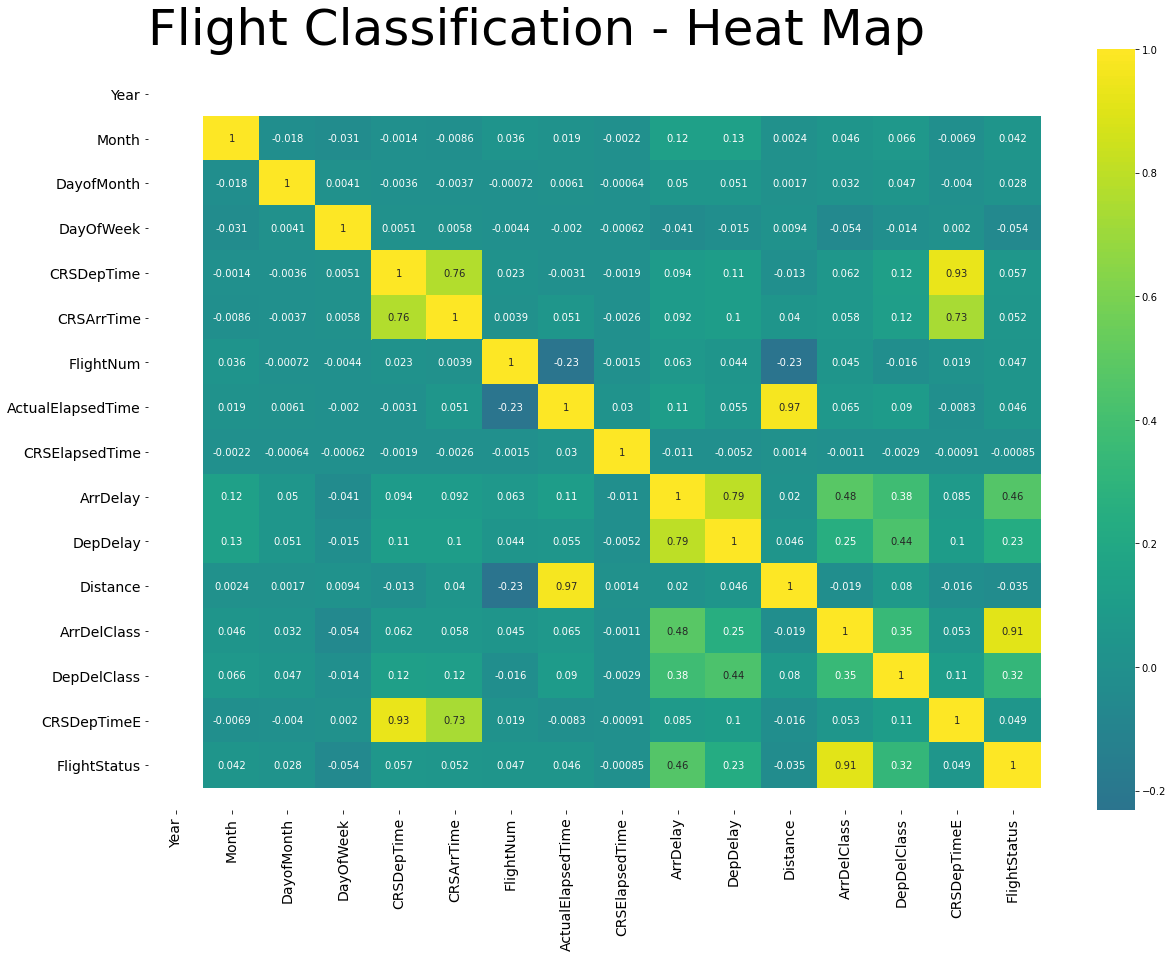

In [73]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df1.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Flight Classification - Heat Map", fontsize = 50, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

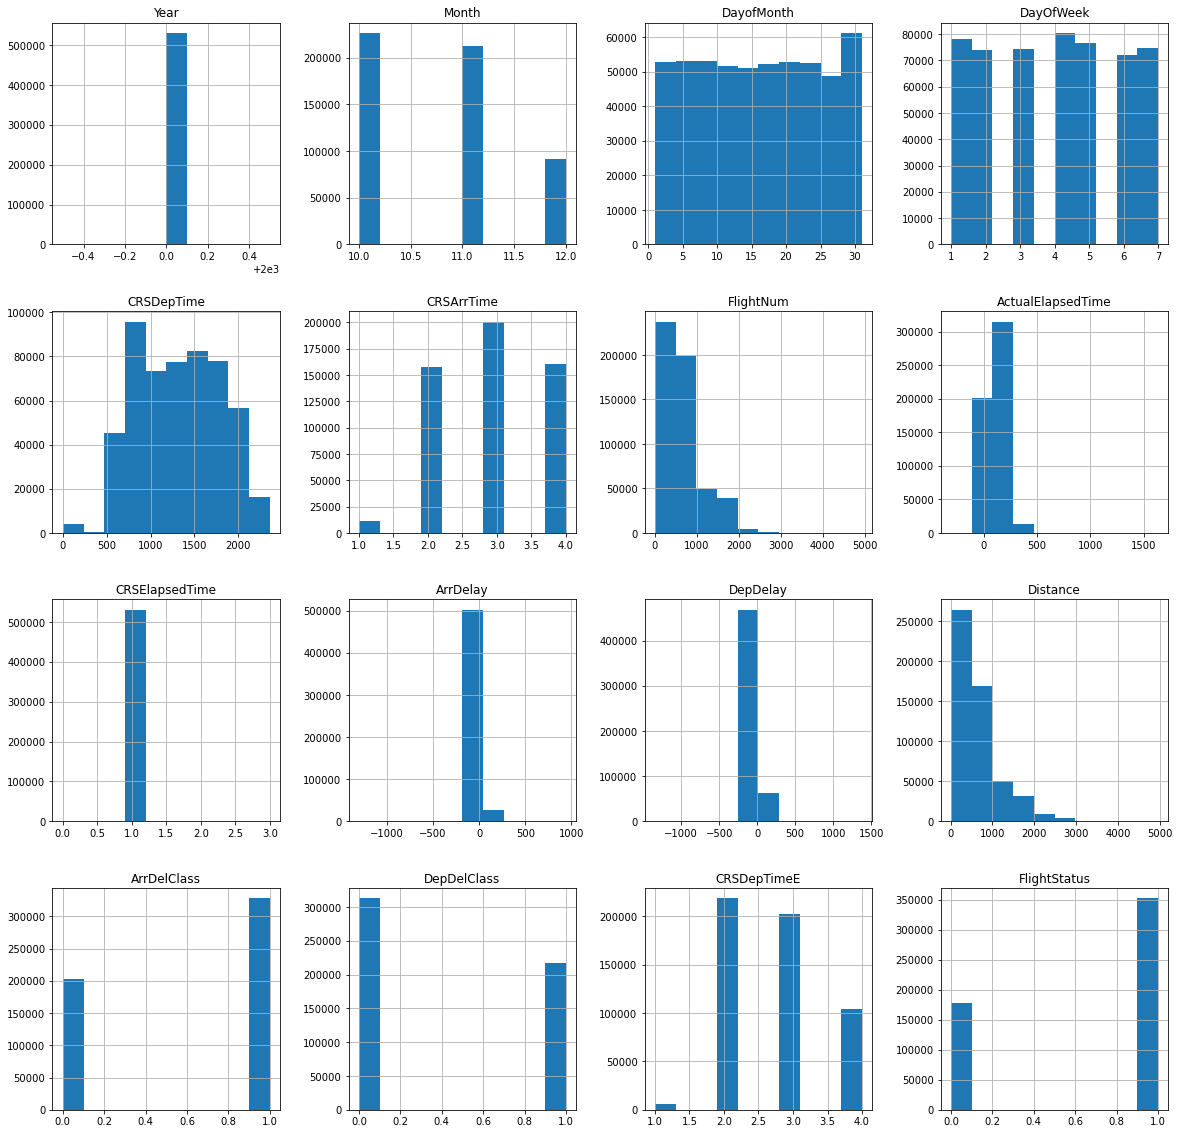

In [74]:
df1.hist(figsize  = [20, 20],bins=10) 
plt.show()

In [76]:
df1.dtypes


Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
CRSDepTime             int64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime         int64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
IsArrDelayed          object
IsDepDelayed          object
ArrDelClass            int64
DepDelClass            int64
CRSDepTimeE            int64
FlightStatus           int64
dtype: object